#6.5 Unsupervised Machine Learning

Content:
- Task 1 - Install and import the necessary libraries
- Task 2 - Import the dataset and conduct any necessary cleaning, manipulations and reprocessing
- Task 3 - Use the elbow technique to find ideal number of clusters
- Task 4 - Make an informed decision regarding the number of clusters
- Task 5 - Run the k-means algorithm
- Task 6 - Attach a new column to the dataframe with the resulting clusters
- Task 7 - Create a few visualizations using the clustered data
- Task 8 - Discuss how and why the clusters make sense
- Task 9 - Calculate the descriptive statistics of the clusters

1. Install and import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#making graphs created display within the notebook without having to be called upon
%matplotlib inline

2. Import the dataset and conduct any necessary cleaning, manipulations and reprocessing

In [3]:
#set path
path=r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Achievement_6'

In [4]:
#import dataset
df=pd.read_pickle(os.path.join(path, '02_Data','02_Prepared_Data','trending_yt_videos_full_checked.pkl'))

In [5]:
df.columns

Index(['title', 'channel_name', 'daily_rank', 'daily_movement',
       'weekly_movement', 'snapshot_date', 'country', 'view_count',
       'like_count', 'comment_count', 'description', 'thumbnail_url',
       'video_id', 'channel_id', 'video_tags', 'kind', 'publish_date',
       'language'],
      dtype='object')

In [6]:
df.dtypes

title              object
channel_name       object
daily_rank          int64
daily_movement      int64
weekly_movement     int64
snapshot_date      object
country            object
view_count          int64
like_count          int64
comment_count       int64
description        object
thumbnail_url      object
video_id           object
channel_id         object
video_tags         object
kind               object
publish_date       object
language           object
dtype: object

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
df['publish_date'].value_counts()

publish_date
2023-11-10 00:00:00+00:00    7247
2023-11-02 00:00:00+00:00    7155
2023-10-28 00:00:00+00:00    7014
2023-10-29 00:00:00+00:00    6985
2023-11-05 00:00:00+00:00    6805
                             ... 
2023-10-08 20:11:37+00:00       1
2023-09-28 22:00:22+00:00       1
2023-10-21 06:06:11+00:00       1
2023-10-21 01:06:02+00:00       1
2023-09-28 22:00:12+00:00       1
Name: count, Length: 2334, dtype: int64

In [9]:
df["publish_date"] = pd.to_datetime(df["publish_date"])

In [10]:
df['publish_date'].describe()

count                                 197757
mean     2023-11-05 18:09:47.641661184+00:00
min                2023-09-20 02:22:46+00:00
25%                2023-10-28 00:00:00+00:00
50%                2023-11-06 00:00:00+00:00
75%                2023-11-15 00:00:00+00:00
max                2023-11-28 00:00:00+00:00
Name: publish_date, dtype: object

In [11]:
#create subset with only numerical variables
df_num=df[['daily_rank','daily_movement','weekly_movement','view_count','like_count','comment_count']]
df_num.head()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count
0,1,0,0,659445,12525,1154
1,2,0,48,96852,6361,795
2,3,0,47,1236824,41518,1290
3,4,1,46,6607439,153575,5580
4,5,-1,-3,19193308,858667,36413


In [12]:
df_num.shape

(197757, 6)

In [13]:
#check for missing values
df_num.isnull().sum()

daily_rank         0
daily_movement     0
weekly_movement    0
view_count         0
like_count         0
comment_count      0
dtype: int64

In [14]:
#check for duplicates
dups = df_num.duplicated()
dups.shape

(197757,)

In [15]:
#defines range of potential clusters in the data
num_cl = range(1, 10)
#defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [17]:
#create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]
score

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-6.790294404583669e+19,
 -1.9445106063325487e+19,
 -9.47231652757398e+18,
 -5.45982645036924e+18,
 -3.7971724618358016e+18,
 -2.6696213543798113e+18,
 -1.9477983017755684e+18,
 -1.4944900966235433e+18,
 -1.2009873919492936e+18]

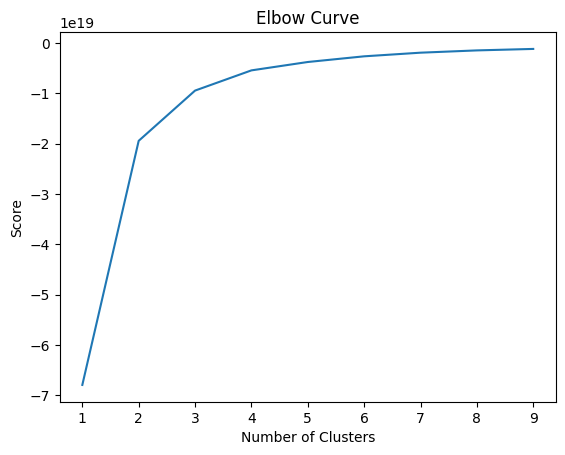

In [18]:
#plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [19]:
#create the k-means object
kmeans= KMeans(n_clusters=3)

In [20]:
#fit the k-means object to the data
kmeans.fit(df_num)

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

KMeans(n_clusters=3)

In [21]:
#create new column with clusters
df_num['clusters'] = kmeans.fit_predict(df_num)
df_num.head()

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count,clusters
0,1,0,0,659445,12525,1154,0
1,2,0,48,96852,6361,795,0
2,3,0,47,1236824,41518,1290,0
3,4,1,46,6607439,153575,5580,0
4,5,-1,-3,19193308,858667,36413,0


In [23]:
df_num['clusters'].value_counts()

clusters
0    171179
1     21282
2      5296
Name: count, dtype: int64

In [24]:
#export dataset
df_num.to_csv(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_clusters.csv'))

In [25]:
#standardise the values in each column
df_ml=(df_num-df_num.mean())/df_num.std()
df_ml.head()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count,clusters
0,-1.697759,-0.169967,-1.034155,-0.433233,-0.410336,-0.210137,-0.370978
1,-1.628465,-0.169967,1.459646,-0.463616,-0.418934,-0.221090,-0.370978
2,-1.559171,-0.169967,1.407691,-0.402050,-0.369895,-0.205987,-0.370978
3,-1.489877,-0.119521,1.355737,-0.112002,-0.213589,-0.075092,-0.370978
4,-1.420583,-0.220413,-1.190018,0.567718,0.769925,0.865674,-0.370978


3. Use the elbow technique to find ideal number of clusters

In [26]:
#defines range of potential clusters in the data
num_cl = range(1, 10)
#defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [27]:
#create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_ml).score(df_ml) for i in range(len(kmeans))]
score

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1384291.9999995327,
 -960163.2387157447,
 -687944.3309445946,
 -572092.358345587,
 -496192.86310102005,
 -427452.8735826593,
 -389108.20281020086,
 -352450.2820755326,
 -320199.0548559798]

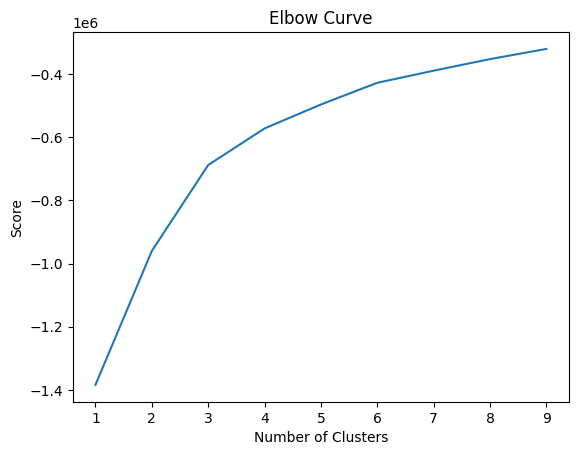

In [28]:
#plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

4. Make an informed decision about the number of clusters

While the breaking point of the curve is not particularly pronounced, my observation led me to choose to continue with 3 clusters, since it is around that point that the most pronounced angle seems to be, after which the growth starts to slow down, even if not dramatically so.

5. Run the k-means algorithm

In [29]:
#create the k-means object
kmeans= KMeans(n_clusters=3)

In [30]:
#fit the k-means object to the data
kmeans.fit(df_ml)

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

KMeans(n_clusters=3)

6. Attach a new column to the dataframe with the resulting clusters

In [31]:
#create new column with clusters
df_ml['clusters'] = kmeans.fit_predict(df_ml)
df_ml.head()

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count,clusters
0,-1.697759,-0.169967,-1.034155,-0.433233,-0.410336,-0.210137,0
1,-1.628465,-0.169967,1.459646,-0.463616,-0.418934,-0.221090,0
2,-1.559171,-0.169967,1.407691,-0.402050,-0.369895,-0.205987,0
3,-1.489877,-0.119521,1.355737,-0.112002,-0.213589,-0.075092,0
4,-1.420583,-0.220413,-1.190018,0.567718,0.769925,0.865674,0


In [32]:
df_ml['clusters'].value_counts()

clusters
1    91292
0    84789
2    21676
Name: count, dtype: int64

7. Create a few visualisations using the clustered data

In [33]:
#create a correlation matrix using pandas
df_ml.corr()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count,clusters
daily_rank,1.000000,-0.563344,-0.772525,0.014296,-0.013169,-0.028833,0.554483
daily_movement,-0.563344,1.000000,0.499404,-0.052591,-0.052679,-0.020607,-0.448231
weekly_movement,-0.772525,0.499404,1.000000,-0.166609,-0.119706,-0.006172,-0.597424
view_count,0.014296,-0.052591,-0.166609,1.000000,0.828267,0.288552,0.578181
like_count,-0.013169,-0.052679,-0.119706,0.828267,1.000000,0.491811,0.517685
comment_count,-0.028833,-0.020607,-0.006172,0.288552,0.491811,1.000000,0.245398
clusters,0.554483,-0.448231,-0.597424,0.578181,0.517685,0.245398,1.000000


C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


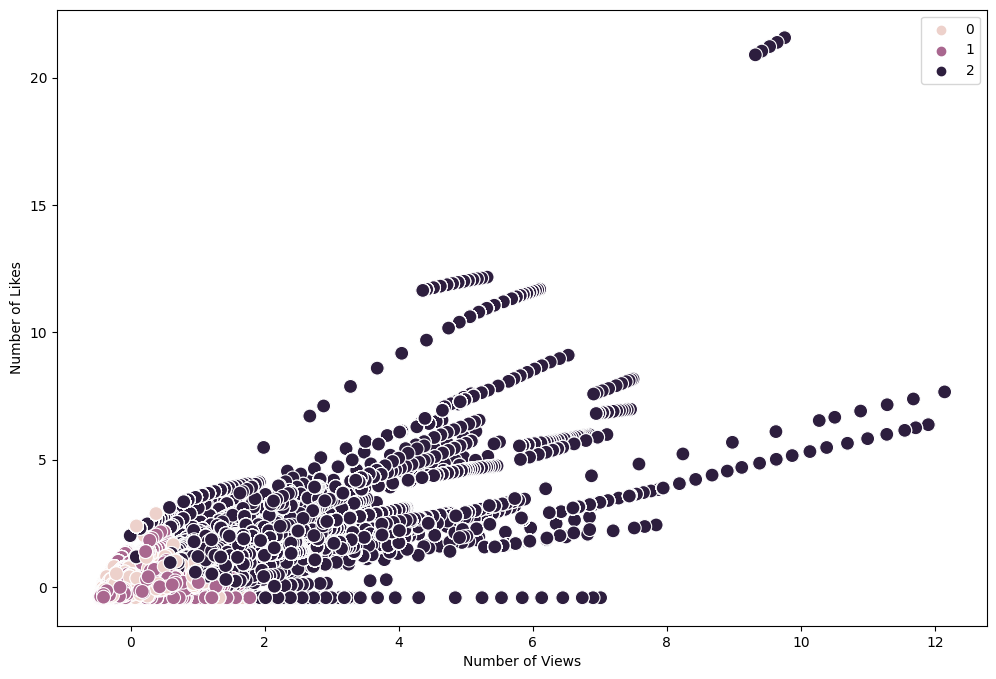

In [34]:
#plot the clusters for the view_count and like_count variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['view_count'], y=df_ml['like_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Views') # Label x-axis.
plt.ylabel('Number of Likes') # Label y-axis.
plt.show()

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


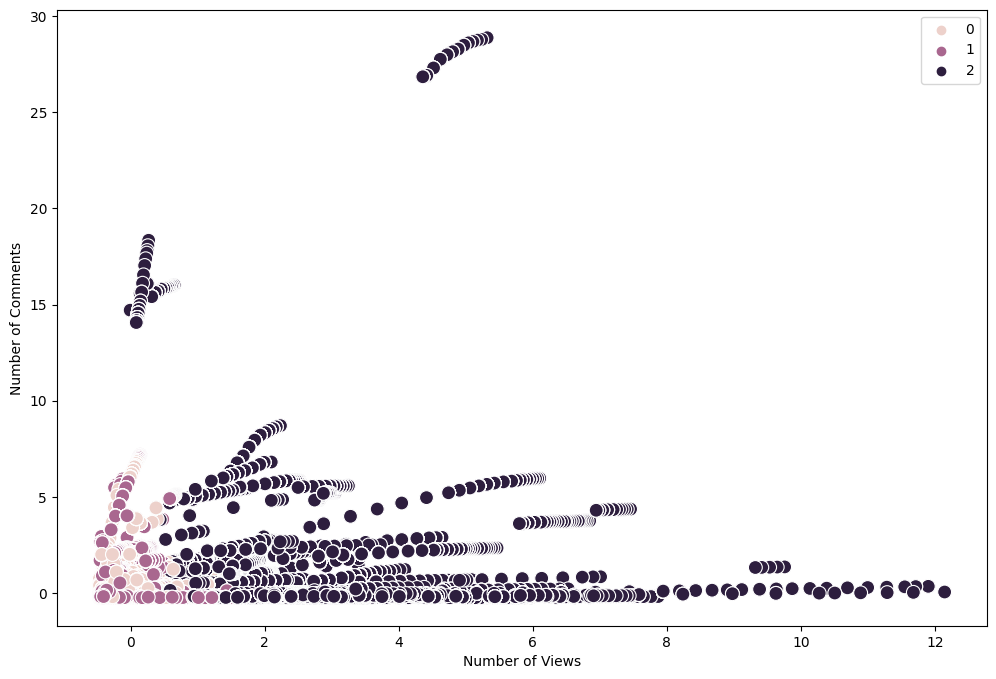

In [35]:
#plot the clusters for the view_count and comment_count variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['view_count'], y=df_ml['comment_count'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Views') # Label x-axis.
plt.ylabel('Number of Comments') # Label y-axis.
plt.show()

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


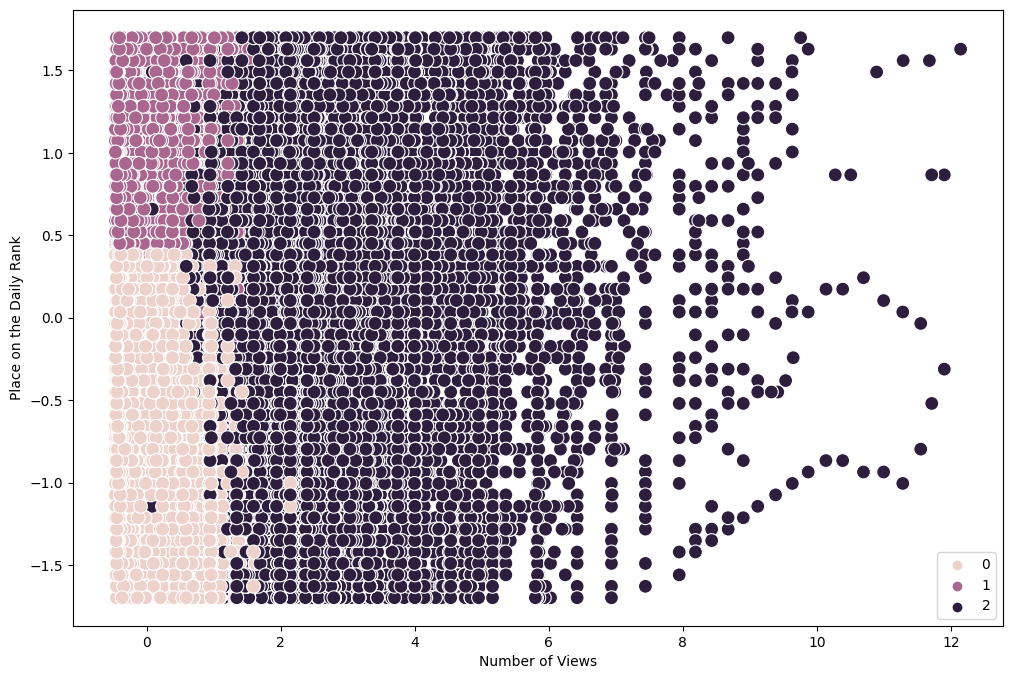

In [36]:
#plot the clusters for the view_count and daily_rank variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_ml['view_count'], y=df_ml['daily_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Views') # Label x-axis.
plt.ylabel('Place on the Daily Rank') # Label y-axis.
plt.show()

8. Discuss how and why the clusters make sense

Cluster 0 seems to represent videos with low to average engagement (in the form of views, likes and comments) that scored at a higher place on the daily_rank, as opposed to cluster 2, seemingly consisting mostly of videos that have both a low engagement and ocuppying a lower position on the ranking. These clusters are similar in size. Cluster 1, the one with the smallest number of observations, seems to me to consist a little bit of "wild cards", videos that are in some ways outliers, either because they performed exceptionally well in terms of engagement, reaching more extreme values, or because the patterns observed are not the ones expected for these variables.

9. Calculate the descriptive statistics for the clusters

In [37]:
#calculate descriptive statistics using groupby
df_ml.groupby('clusters').agg({'view_count':['mean', 'median'], 
                         'like_count':['mean', 'median'],
                         'comment_count':['mean','median'],
                          'daily_rank':['mean','median']})

view_count           like_count           comment_count            \
               mean    median       mean    median          mean    median   
clusters                                                                     
0         -0.293545 -0.420901  -0.258403 -0.381767     -0.116519 -0.212608   
1         -0.282212 -0.413358  -0.260909 -0.380489     -0.134771 -0.215293   
2          2.336829  1.990620   2.109645  1.530605      1.023391 -0.053185   

         daily_rank            
               mean    median  
clusters                       
0         -0.848803 -0.866230  
1          0.783115  0.866123  
2          0.022008  0.034594

In [38]:
#compare to overall statistics of standardized dataset
df_ml.describe()

,daily_rank,daily_movement,weekly_movement,view_count,like_count,comment_count,clusters
count,1.977570e+05,1.977570e+05,1.977570e+05,1.977570e+05,1.977570e+05,1.977570e+05,197757.000000
mean,-2.151314e-17,9.198104e-18,-4.656540e-17,-4.900865e-17,-1.408460e-17,-9.449614e-18,0.680856
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.660690
min,-1.697759e+00,-2.641817e+00,-3.579911e+00,-4.688470e-01,-4.278072e-01,-2.453470e-01,0.000000
25%,-8.662297e-01,-6.239802e-01,-6.704761e-01,-4.495111e-01,-4.120061e-01,-2.334475e-01,0.000000
50%,3.459361e-02,-2.204129e-01,5.688250e-02,-4.002873e-01,-3.654243e-01,-2.089467e-01,1.000000
75%,8.661228e-01,5.867217e-01,7.842411e-01,-1.100432e-01,-8.344080e-02,-1.277246e-01,1.000000
max,1.697652e+00,2.301883e+00,1.511600e+00,1.214420e+01,2.156664e+01,2.887302e+01,2.000000


In [39]:
df_ml[['view_count','like_count','comment_count','daily_rank']].median()

view_count      -0.400287
like_count      -0.365424
comment_count   -0.208947
daily_rank       0.034594
dtype: float64

One thing that jumps to my attention is the discrepancy between even the highest/lowest mean values of each cluster individually when compared to the overall dataset. The clustering of the data seems to provide much better opportunities for analysis in situations like this one, where there are a lot of outliers but behave in a very different way from the majority of the data but are still a relevant part of the data and cannot simply be ignored.
I think these clusters will become useful especially when separating those two types of data, the entries that behave following a relatively predictable pattern and those that do not seem to.

In [40]:
#export dataset
df_ml.to_pickle(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_standardized_clusters.pkl'))

In [41]:
#export dataset
df_ml.to_csv(os.path.join(path,'02_Data','02_Prepared_Data','trending_yt_videos_standardized_clusters.csv'))